# 1. What is a t-test

A t-test is a statistical method used to compared the means of two populations (or samples)

# 2. Why is it useful?

It can inform on whether two samples are likely to be drawn from different populations, but it can also inform on the effectiveness of a specific treatment or intervention

# 3. What are the types of t-test

1. __One sample t-test__: is the mean of a population statistically different from a hypothesized or known value?
2. __Paired t-test__: is the mean of a population before and after a test statistically different? The crucial point is that we are testing the same population at 2 different times
3. __Indipendent t-test__: is the mean of 2 distinct population statistically significant, e.g. are football players shorter than basketball players?

One tailed vs two tailed t-test: do we have hypothesis on the directionality of the mean difference?

# 4. What assumptions have to be met in order to be able to perform a t-test

- Data is roughly normally distributed
- Variance in the 2 groups is roughly similar
- Sample size in the 2 groups is roughly similar

# Demo

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

## Create some data

In [3]:
data1 = {'sport': 'basket', 'height_in_cm' : np.random.normal(198,9,500)}
data2 = {'sport': 'football', 'height_in_cm': np.random.normal(178,11,500)}

In [4]:
data1 = pd.DataFrame(data1)
data2 = pd.DataFrame(data2)

In [5]:
sport_df = pd.concat([data1,data2]).reset_index(drop=True)

In [6]:
sport_df.sample(5)

,sport,height_in_cm
662,football,182.719947
678,football,180.431341
231,basket,174.854999
811,football,181.492280
127,basket,213.797064


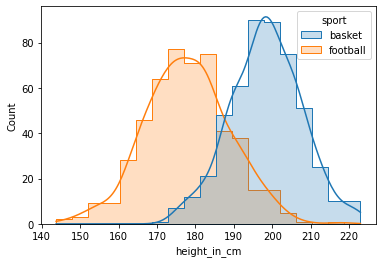

In [7]:
ax = sns.histplot(data=sport_df,x='height_in_cm',hue='sport',element='step',kde=True)

# T-test calculations

$ t = {\hat{x}_{1} - \hat{x}_{2}} /  \sqrt{s^{2}_{1} / n_{1}  +  s^{2}_{2}/n_{2}} $

Firstly, we need to calculate the t value. The t value is a test statistic that we will use to calculate the p value.
To calculate the t value, we need the mean and variance of both groups, and the sample size of both groups (in this case, they're the same).

In [8]:
x1_m = sport_df.loc[sport_df.sport=='basket']['height_in_cm'].mean()

In [9]:
x2_m = sport_df.loc[sport_df.sport=='football']['height_in_cm'].mean()

In [10]:
x1_v = sport_df.loc[sport_df.sport=='basket']['height_in_cm'].var()

In [11]:
x2_v = sport_df.loc[sport_df.sport=='football']['height_in_cm'].var()

In [12]:
n = sport_df.loc[sport_df.sport=='football'].shape[0]

In [13]:
print('First group mean: ' + str(round(x1_m,2)))
print('Second group mean: ' + str(round(x2_m,2)))
print('First group variance: ' + str(round(x1_v,2)))
print('Second group variance: ' + str(round(x2_v,2)))
print('Sample size: ' + str(n))

First group mean: 198.41
Second group mean: 177.9
First group variance: 86.26
Second group variance: 120.64
Sample size: 500


In [18]:
signal = abs(x1_m - x2_m)

In [19]:
noise = np.sqrt(x1_v/n + x2_v/n)

In [20]:
t_value = signal/noise

In [21]:
t_value

32.477179621695846

The t-value indicates the number of standard deviations from the hypothetical t-distribution mean. The bigger it is, 
the most likely differences will be statistically significant.

# t-test in scipy

To run a t-test, we can use the scipy package

In [14]:
from scipy import stats

## indipendent t-test

In [15]:
#help(stats.ttest_ind)

In [16]:
stats.ttest_ind(sport_df.loc[sport_df.sport=='basket']['height_in_cm'],
               sport_df.loc[sport_df.sport=='football']['height_in_cm'])

Ttest_indResult(statistic=31.877897042314206, pvalue=2.3405323898628527e-154)

A significant p-value (significancy level is often set normally at 0.05) informs us on how likely it would be to observe results
as or more extreme than the one we observed, under the null hypothesis $ h_{0} $ (the two groups are sampled from the same distribution)

## one sample t-test

In [ ]:
In a one sample t-test, I can test whether m

In [2]:
#help(stats.ttest_1samp)

In [26]:
stats.ttest_1samp(sport_df.loc[sport_df.sport=='basket']['height_in_cm'],198)

Ttest_1sampResult(statistic=0.10146190046787389, pvalue=0.9192245558683695)

The p-value is fairly large, meaning we can't really afford to reject the null hypothesis that our sample comes
from a distribution with a mean of 198 cm

In [27]:
stats.ttest_1samp(sport_df.loc[sport_df.sport=='basket']['height_in_cm'],170)

Ttest_1sampResult(statistic=74.36753415734947, pvalue=3.687335923789493e-272)

We can indeed reject the null hypothesis of our sample coming from a distribution with mean 170, as this result would 
extremely unlikely

In [3]:
#help(stats.ttest_rel)